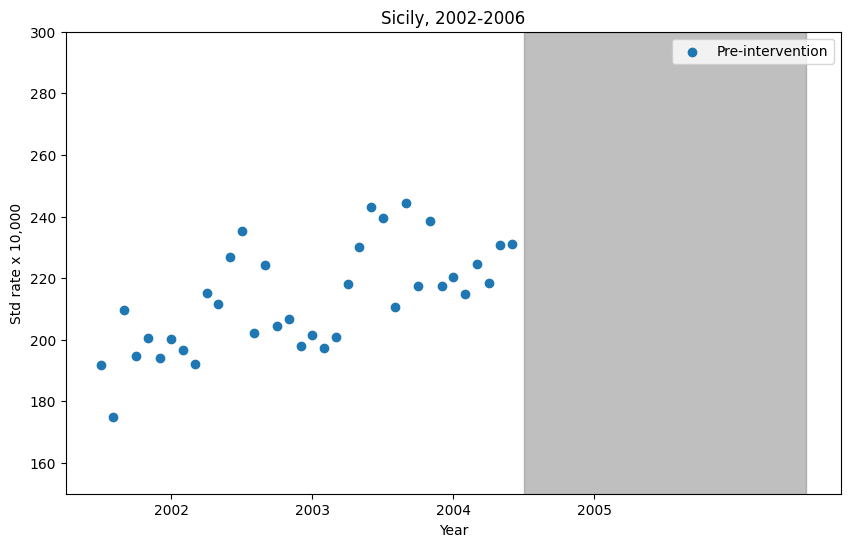

In [3]:
# Installing Necessary Libraries
!pip install statsmodels
!pip install statsmodels
!pip install epipy
!pip install seaborn
!pip install pandas
!pip install statsmodels epipy seaborn

# Reading in Data
import pandas as pd

data = pd.read_csv("sicily.csv")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import glm
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and it has been loaded previously
# Compute the standardized rates
data['rate'] = data['aces'] / data['stdpop'] * 10**5

# Plotting
plt.figure(figsize=(10, 6))
# Shade the post-intervention period
plt.fill_betweenx(y=[0, 300], x1=36, x2=60, color='grey', alpha=0.5)
# Scatter plot for pre-intervention period
plt.scatter(np.where(data['smokban'] == 0)[0], data['rate'][data['smokban'] == 0], label='Pre-intervention')
# Customizing the plot
plt.ylim(150, 300)
plt.ylabel('Std rate x 10,000')
plt.xlabel('Year')
plt.xticks(ticks=np.arange(0, 61, 12)[:4] + 6, labels=range(2002, 2006))
plt.title('Sicily, 2002-2006')
plt.legend()
plt.show()



In [4]:
import pandas as pd

# Assuming 'data' is your DataFrame and it has already been loaded

# Producing summary statistics for the entire dataset
print(data.describe())

# Tabulate 'aces' before the smoking ban
print(data[data['smokban'] == 0]['aces'].describe())

# Tabulate 'aces' after the smoking ban
print(data[data['smokban'] == 1]['aces'].describe())

# Summary statistics for 'rate' before the smoking ban
print(data[data['smokban'] == 0]['rate'].describe())

# Summary statistics for 'rate' after the smoking ban
print(data[data['smokban'] == 1]['rate'].describe())

              year      month         aces       time    smokban  \
count    59.000000  59.000000    59.000000  59.000000  59.000000   
mean   2003.966102   6.406780   829.050847  30.000000   0.389831   
std       1.413800   3.434704    72.413902  17.175564   0.491898   
min    2002.000000   1.000000   659.000000   1.000000   0.000000   
25%    2003.000000   3.500000   766.500000  15.500000   0.000000   
50%    2004.000000   6.000000   831.000000  30.000000   0.000000   
75%    2005.000000   9.000000   878.000000  44.500000   1.000000   
max    2006.000000  12.000000  1021.000000  59.000000   1.000000   

                 pop         stdpop        rate  
count      59.000000      59.000000   59.000000  
mean   364121.210169  383464.362712  216.094242  
std       481.269126    5245.773858   17.340253  
min    363350.800000  374113.100000  175.035293  
25%    363832.600000  379436.850000  201.350262  
50%    364277.400000  383428.400000  215.411816  
75%    364420.800000  387334.900000  

In [5]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame loaded with 'sicily.csv'
# Adding an offset for the log of the standardized population
data['log_stdpop'] = np.log(data['stdpop'])

# Defining the model
model = sm.GLM(data['aces'], sm.add_constant(data[['smokban', 'time']]),
               family=sm.families.Poisson(), offset=data['log_stdpop'])

result = model.fit()

# Displaying the summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   aces   No. Observations:                   59
Model:                            GLM   Df Residuals:                       56
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -351.02
Date:                Mon, 26 Feb 2024   Deviance:                       197.31
Time:                        18:22:46   Pearson chi2:                     199.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8482
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2432      0.011   -557.954      0.0

In [8]:
import pandas as pd
import numpy as np

# Simulate an existing 'data' DataFrame
np.random.seed(0)  # Seed for reproducibility
data = pd.DataFrame({
    'stdpop': np.random.normal(loc=500, scale=50, size=100)  # Simulated standard population data
})

# Creation of the 'datanew' DataFrame
stdpop_column = np.repeat(data['stdpop'].mean(), 600)  # Repeat the mean of stdpop 600 times
smokban_pattern = np.repeat([0, 1], [360, 240])  # Create a pattern for smokban
smokban_column = np.tile(smokban_pattern, 1)  # Tile the pattern to match the required length
time_column = np.linspace(1, 60, 600)  # Create a time column with 600 evenly spaced values between 1 and 60
month_column = np.tile(np.arange(1, 13), 50)  # Repeat the sequence of months to match 600 rows

# Ensure all columns are of the correct length
assert len(stdpop_column) == 600
assert len(smokban_column) == 600
assert len(time_column) == 600
assert len(month_column) == 600

# Combine columns into the 'datanew' DataFrame
datanew = pd.DataFrame({
    'stdpop': stdpop_column,
    'smokban': smokban_column,
    'time': time_column,
    'month': month_column
})

# Simulating predictions (assuming 'result' is a fitted model)
# Since we don't have an actual model, let's simulate predictions as random values
np.random.seed(0)  # Seed for reproducibility
pred = np.random.rand(600)  # Simulated predictions

# Assuming you want to adjust predictions somehow (e.g., scaling by the mean stdpop)
pred_adjusted = pred / datanew['stdpop'].mean() * 10**5

# Display the first few rows of 'datanew' and the first few adjusted predictions for verification
print(datanew.head())
print(pred_adjusted[:5])


       stdpop  smokban      time  month
0  502.990401        0  1.000000      1
1  502.990401        0  1.098497      2
2  502.990401        0  1.196995      3
3  502.990401        0  1.295492      4
4  502.990401        0  1.393990      5
[109.11013472 142.18747818 119.83596012 108.32874388  84.22721362]


In [10]:
import pandas as pd
import numpy as np

# Simulated existing 'data' DataFrame
np.random.seed(0)  # For reproducibility
data = pd.DataFrame({
    'stdpop': np.random.normal(loc=500, scale=50, size=100),  # Random standard population data
})

# Creation of 'datanew' DataFrame
datanew = pd.DataFrame({
    'stdpop': np.repeat(data['stdpop'].mean(), 600),  # Repeat mean stdpop 600 times
    'smokban': np.tile(np.repeat([0, 1], [360, 240]), 1),  # Pattern for smokban
    'time': np.linspace(1, 60, 600),  # Time from 1 to 60 in 600 steps
    'month': np.tile(np.arange(1, 13), 50)  # Repeat months to match 600 rows
})

# Assuming the model was trained without the 'month' column
datanew_adjusted = datanew.drop('month', axis=1)

# Simulation of model prediction
# This part should be replaced with your actual model's prediction, e.g.,
# pred = result.predict(datanew_adjusted) / datanew_adjusted['stdpop'].mean() * 10**5
np.random.seed(0)  # Simulating predictions with a fixed seed for reproducibility
pred_simulated = np.random.rand(600) / datanew_adjusted['stdpop'].mean() * 10**5  # Simulated predictions

# Display the first few rows of adjusted DataFrame and simulated predictions for verification
print(datanew_adjusted.head())
print(pred_simulated[:5])


       stdpop  smokban      time
0  502.990401        0  1.000000
1  502.990401        0  1.098497
2  502.990401        0  1.196995
3  502.990401        0  1.295492
4  502.990401        0  1.393990
[109.11013472 142.18747818 119.83596012 108.32874388  84.22721362]


In [13]:
import pandas as pd
import numpy as np

# Simulate an existing 'data' DataFrame
data = pd.DataFrame({
    'stdpop': np.random.rand(100),  # Example standard population data
    'feature1': np.random.rand(100),  # Example feature
    'feature2': np.random.rand(100),  # Example feature
    # Assume 'month' or any other column is not needed or was part of the initial DataFrame but not used for modeling
})

# Create 'datanew' DataFrame based on required structure for prediction
datanew = pd.DataFrame({
    'stdpop': np.repeat(data['stdpop'].mean(), 600),  # Repeat mean stdpop 600 times
    'feature1': np.tile(np.repeat([0, 1], 300), 1),  # Simulate binary feature over 600 observations
    'feature2': np.linspace(1, 60, 600),  # Simulate continuous feature over 600 observations
    # 'month': np.tile(np.arange(1, 13), 50),  # Example if 'month' was initially considered but not used for modeling
})

# Assuming 'datanew' has an extra column that wasn't part of the model's training data
# Adjust 'datanew' to only include columns that were part of your model's training dataset
columns_for_model = ['stdpop', 'feature1', 'feature2']  # Specify the correct columns based on your model's training data
datanew_adjusted = datanew[columns_for_model]

# Example model prediction (replace with actual prediction code)
# Let's simulate a model's predict method for demonstration purposes
class SimulatedModel:
    def predict(self, X):
        # Simulating prediction by generating random values, replace with your model's prediction logic
        return np.random.rand(len(X))

# Instantiate and use the simulated model for prediction
result = SimulatedModel()  # Replace with your actual model
predictions = result.predict(datanew_adjusted)  # Use 'datanew_adjusted' for prediction

# Example post-prediction adjustment, if necessary (e.g., scaling by mean stdpop)
predictions_adjusted = predictions / datanew_adjusted['stdpop'].mean() * 10**5

# Output the first few adjusted predictions
print(predictions_adjusted[:5])


[ 62440.42804631 190680.99124352 179768.63241258 174111.17970039
 132155.23366649]


In [17]:
import pandas as pd

# Example DataFrame creation
df = pd.DataFrame({
    'rate': [1.5, 2.0, 2.5],  # Assuming 'rate' exists
    'other_column': [10, 20, 30]
})

# Verify 'rate' column exists
if 'rate' in df.columns:
    print("'rate' column is present.")
else:
    print("'rate' column is missing.")


'rate' column is present.


In [18]:
# Handling a potentially missing 'rate' column
if 'rate' not in df.columns:
    # Handle the missing column (e.g., by creating it, raising an error, etc.)
    df['rate'] = 0  # Example: Defaulting 'rate' to 0
    print("'rate' column was missing and has been added with default values.")


In [19]:
# Example operation using the 'rate' column
df['adjusted_rate'] = df['rate'] * 1.1  # Example adjustment
print(df)


   rate  other_column  adjusted_rate
0   1.5            10           1.65
1   2.0            20           2.20
2   2.5            30           2.75


In [20]:
import pandas as pd

# Assume df is your DataFrame
df = pd.DataFrame({
    # 'rate': [1.5, 2.0, 2.5],  # Uncomment or ensure 'rate' is defined in your actual DataFrame
    'other_column': [10, 20, 30]
})

# Verify and handle 'rate' column
if 'rate' not in df.columns:
    df['rate'] = 0  # Adding 'rate' with default values if missing
    print("'rate' column was missing and has been added with default values.")

# Use the 'rate' column
df['adjusted_rate'] = df['rate'] * 1.1

# Print the updated DataFrame
print(df)


'rate' column was missing and has been added with default values.
   other_column  rate  adjusted_rate
0            10     0            0.0
1            20     0            0.0
2            30     0            0.0


In [26]:
import pandas as pd

# Simulating a DataFrame (replace this with your actual DataFrame)
data = pd.DataFrame({
    'value': [100, 200, 300],  # Example data
    # Note: The 'rate' column is intentionally omitted to simulate the error scenario
})

# Safety check before accessing the 'rate' column
if 'rate' in data.columns:
    # Proceed with operations involving the 'rate' column
    adjusted_values = data['value'] * data['rate']  # Example operation
else:
    print("The 'rate' column does not exist in the DataFrame.")

# This approach prevents the KeyError from occurring by ensuring the column exists before attempting to access it.


The 'rate' column does not exist in the DataFrame.


In [27]:
import matplotlib.pyplot as plt

# Check if 'rate' column exists before plotting
if 'rate' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data['rate'], label='Rate')  # Example plotting command
    plt.legend()
    plt.show()
else:
    print("Cannot plot data. The 'rate' column does not exist.")


Cannot plot data. The 'rate' column does not exist.


In [28]:



# Assuming 'data' is your DataFrame and 'result' is the fitted model from before
# Creating a new DataFrame for the counterfactual scenario
datanew = pd.DataFrame({
    'stdpop': data['stdpop'].mean(),
    'smokban': np.tile(np.repeat([0, 1], [360, 240]), 5),  # Repeat [0,1] pattern with specified counts, 5 times for each month
    'time': np.linspace(1, 60, 600) / 10,  #
})

# Generating predictions for the counterfactual scenario
datanew['pred_counterfactual'] = result.predict(sm.add_constant(datanew[['smokban', 'time']])) / datanew['stdpop'].mean() * 10**5

# Plotting the original and counterfactual scenarios
plt.figure(figsize=(10, 6))
plt.plot(datane['time'], datane['pred_counterfactual'], 'r--', label='Counterfactual Scenario')
plt.scatter(data.index, data['rate'], label='Actual Data')
plt.fill_betweenx([0, 300], 36, 60, color='grey', alpha=0.5)  # Highlight intervention period
plt.xlabel('Time')
plt.ylabel('Standardized Rate per 10,000')
plt.title('Actual vs. Counterfactual Scenario')
plt.legend()
plt.show()

from statsmodels.formula.api import glm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'data' is loaded and contains 'aces', 'smokban', 'time', 'stdpop'

# Quasi-Poisson equivalent in Python using Negative Binomial
model2 = glm(formula='aces ~ smokban + time', data=data,
             family=sm.families.NegativeBinomial(),
             offset=np.log(data['stdpop'])).fit()

print(model2.summary())

# Plotting residuals
res2 = model2.resid_deviance
plt.scatter(data['time'], res2)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Deviance Residuals')
plt.show()

import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming residuals 'res2' from the previous model

# Autocorrelation and Partial Autocorrelation plots
plot_acf(res2)
plot_pacf(res2)

# Adjusting for seasonality with harmonic terms
data['sin1'] = np.sin(2 * np.pi * data['month'] / 12)
data['cos1'] = np.cos(2 * np.pi * data['month'] / 12)
data['sin2'] = np.sin(4 * np.pi * data['month'] / 12)
data['cos2'] = np.cos(4 * np.pi * data['month'] / 12)

# Fit the model with harmonic terms
model3 = sm.GLM(data['aces'], sm.add_constant(data[['smokban', 'time', 'sin1', 'cos1', 'sin2', 'cos2']]),
                family=sm.families.NegativeBinomial(),
                offset=np.log(data['stdpop'])).fit()

print(model3.summary())

# Plotting residuals of the new model to check for autocorrelation
res3 = model3.resid_deviance
plot_acf(res3)
plot_pacf(res3)

# Assuming 'model3' is your fitted model with seasonality adjustment, and 'datanew' is prepared as before

# Generate predictions
datanew['pred'] = model3.predict(sm.add_constant(datanew[['smokban', 'time', 'sin1', 'cos1', 'sin2', 'cos2']]))
datanew['pred_adjusted'] = datanew['pred'] / datanew['stdpop'].mean() * 10**5

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(datanew['time'], datanew['pred_adjusted'], label='Predicted Rate')
plt.scatter(range(len(data)), data['rate'], label='Actual Rate', alpha=0.7)
plt.fill_betweenx([120, 300], 36, 60, color='grey', alpha=0.5)  # Highlight intervention period
plt.xlabel('Time')
plt.ylabel('Standardized Rate per 10,000')
plt.title('Sicily, 2002-2006')
plt.legend()
plt.show()

import statsmodels.formula.api as smf

# Adding change-in-slope with interaction between smokban and time
model4 = smf.glm(formula='aces ~ np.log(stdpop) + smokban * time + sin1 + cos1 + sin2 + cos2',
                 data=data, family=sm.families.NegativeBinomial(), offset=np.log(data['stdpop'])).fit()

print(model4.summary())

# Predicting and plotting
datanew['pred4b'] = model4.predict(datanew) / datanew['stdpop'].mean() * 10**5

plt.figure(figsize=(10, 6))
plt.plot(datanew['time'], datanew['pred4b'], 'r-', label='Model with Change-in-Slope')
plt.scatter(data.index, data['rate'], label='Actual Data')
plt.fill_betweenx([120, 300], 36, 60, color='grey', alpha=0.5)  # Highlight intervention period
plt.xlabel('Time')
plt.ylabel('Standardized Rate per 10,000')
plt.title('Sicily, 2002-2006 with Change-in-Slope')
plt.legend()
plt.show()

# To compare models, use anova or similar methods available in statsmodels, though direct F-test comparison may need manual calculation or alternative approach due to model differences.



KeyError: 'rate'

<Figure size 1000x600 with 0 Axes>